In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Solución Analítica

Tenemos la ecuación 

$\frac{\partial T(x,t)}{\partial t} = \frac{K}{C\rho} \nabla^2T(x,t) = \frac{K}{C\rho}\frac{\partial^2 T(x,t)}{\partial x^2}$

Proponemos la solución

$T(x,t) = X(x)T(t)$

$\rightarrow X(x)\frac{dT(t)}{dt} = \frac{K}{C\rho}T(t)\frac{d^2 X(x)}{d x^2}$

Dividimos sobre $T(x,t)$ y $\frac{K}{C\rho}$ e igualamos cada ecuación a -$k^2$, así:

$\frac{dT(t)}{dt} =-\frac{K}{C\rho}k^2T(t)$

$\frac{d^2 X(x)}{d x^2} = -k^2X(x)$

Solucionando la ecuación para el tiempo tenemos que 

$T(t) = e^{-k^2Kt/C\rho}$

Y la espacial:

$X(x) = A \sin(kx)$

Aplicando las condiciones de frontera de que 

$T(x=0,t)=0$ y $T(x=L,t) = 0$

Tenemos que 

$\sin(kL) = 0 \rightarrow k=k_n = \frac{n\pi}{L}$

Entonces la solución es 

$T(x,t) = A_n \sin(k_nx)e^{-k_n^2Kt/C\rho}$

En general la solución es una superposición de todos los estados $n$ entonces:

$T(x,t) = \sum_{n=1}^\infty A_n \sin(k_nx)e^{-k_n^2Kt/C\rho}$

Ahora aplicamos las condiciones temporales 

$T(x,t=0) =T_0 \rightarrow \sum_{n=1}^\infty A_n \sin(k_nx) = T_0$

Proyectando el seno obtenemos que $A_n = 4T_0/n\pi$ para números impares por lo tanto

$T(x,t) =\sum_{n=1,3,\ldots}^\infty \frac{4T_0}{n\pi} \sin(k_nx)e^{-k_n^2Kt/C\rho}$

O bien:

$\fbox{$T(x,t) =\sum_{n=0}^\infty \frac{4T_0}{(2n+1)\pi} \sin(k_{2n+1}x)e^{-k_{2n+1}^2Kt/C\rho}$}$

# 1D

In [2]:
def heat(T):
    print(etta)
    Nx,Nt = np.shape(T)
    for t in range(Nt-1):
        for i in range(Nx-1):
            T[i,t+1] = T[i,t] + etta*(T[i+1,t] + T[i-1,t] -2.*T[i,t])
    return T

In [3]:
K,C,rho = 20.,60., 700.
L = 1.
dx,dt = 0.01,0.01
xf,tf = L,500.
Nx,Nt = int(xf/dx)+1,int(tf/dt)+1
etta = K*dt/(C*rho*dx**2.)
X,Time = np.arange(0,xf+dx,dx),np.arange(0,tf+dt,dt)
T = np.zeros([Nx,Nt])

In [4]:
#Condiciones Iniciales
T[:,0] = 100.
T[0,:] = 0.
T[Nx-1,:] = 0.

In [5]:
T = heat(T)

0.047619047619047616


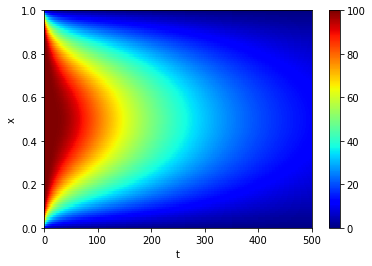

In [6]:
plt.pcolor(Time,X,T,cmap='jet')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.show()

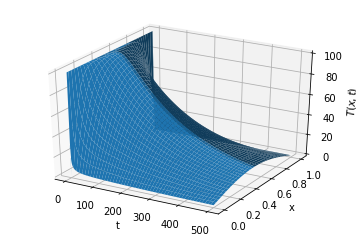

In [7]:
t,x = np.meshgrid(Time,X)
ax = plt.axes(projection='3d')
ax.plot_surface(t,x,T)
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel(r'$T(x,t)$')
plt.show()

# 2D

Para la solución en dos dimensiones tenemos

$\frac{\partial T(x,y,t)}{\partial t} = \frac{K}{C\rho} \nabla^2T(x,y,t) = \frac{K}{C\rho}\frac{\partial^2 T(x,y,t)}{\partial x^2} + \frac{K}{C\rho}\frac{\partial^2 T(x,y,t)}{\partial y^2}$

Aproximamos 

$\frac{\partial T(x,y,t)}{\partial t} \approx \frac{T(x,y,t+\Delta t)-T(x,y,t)}{\Delta t}$

$\frac{\partial^2 T(x,y,t)}{\partial x^2} \approx \frac{T(x+\Delta x,y,t)+T(x-\Delta x,y,t)-2T(x,y,t)}{(\Delta x)^2}$


$\frac{\partial^2 T(x,y,t)}{\partial y^2} \approx \frac{T(x,y+\Delta y,t)+T(x,y-\Delta y,t)-2T(x,y,t)}{(\Delta y)^2}$


si hacemos $\eta_x = \frac{K\Delta t}{C\rho(\Delta x)^2}$ y $\eta_y = \frac{K\Delta t}{C\rho(\Delta y)^2}$

Así 

$T_{i,j,k+1} = T_{i,j,k} + \eta_x[T_{i+1,j,k}+T_{i-1,j,k} - 2T_{i,j,k}]+ \eta_y[T_{i,j+1,k}+T_{i,j-1,k} - 2T_{i,j,k}]$


Donde $x = i\Delta x,y=j\Delta y,t=k\Delta t$

Si en partícular $\Delta x = \Delta y \rightarrow \eta_x = \eta_y=\eta$,  el algoritmo se reduce a:

$T_{i,j,k+1} = T_{i,j,k} + \eta[T_{i+1,j,k}+T_{i-1,j,k} +T_{i,j+1,k}+T_{i,j-1,k}- 4T_{i,j,k}]$

In [8]:
def heat2d(T):
    print(etta1,etta2)
    Nx,Ny,Nt = np.shape(T)
    for t in range(Nt-1):
        for i in range(1,Nx-1):
            for j in range(Ny-1):
                term1 = T[i,j,t]
                term2 = etta1*(T[i+1,j,t] + T[i-1,j,t] -2.*T[i,j,t])
                term3 = etta2*(T[i,j+1,t] + T[i,j-1,t] -2.*T[i,j,t])
                T[i,j,t+1] = term1+term2+term3
    return T

In [9]:
K,C,rho = 20.,60., 700.
L,w = 1.,L/10.
dx,dy,dt = 0.01,0.01,0.01
xf,yf,tf = L,w,500.
Nx,Ny,Nt = int(xf/dx)+1,int(yf/dy)+1,int(tf/dt)+1
etta1 = K*dt/(C*rho*dx**2.)
etta2 = K*dt/(C*rho*dy**2.)
X,Y,Time = np.arange(0,xf+dx,dx),np.arange(0,yf+dy,dy),np.arange(0,tf+tf,dt)
T = np.zeros([Nx,Ny,Nt])


In [10]:
#Condiciones Iniciales
sigma = 1./(5*w)
T[:,:,0] = 100*np.exp(-sigma*Y**2)
T[0,:,:] = 0.
T[Nx-1,:,:] = 0.
T=heat2d(T)

0.047619047619047616 0.047619047619047616


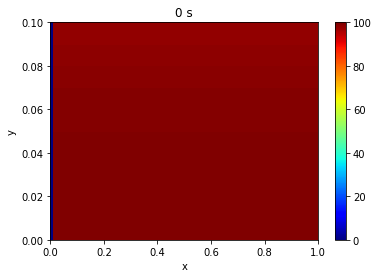

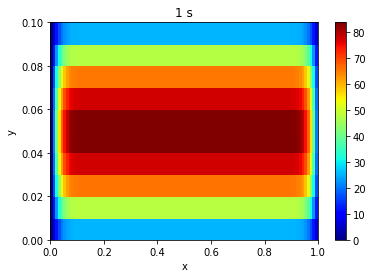

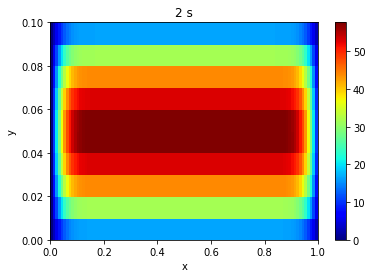

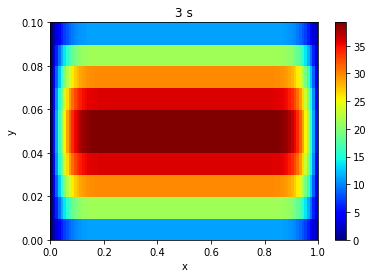

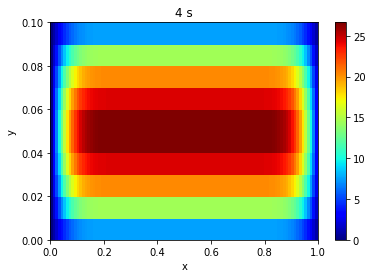

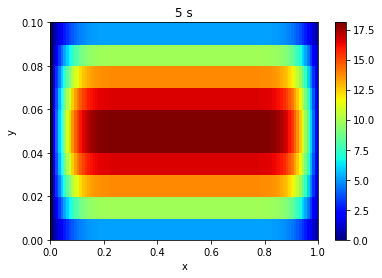

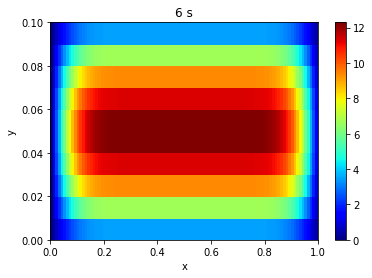

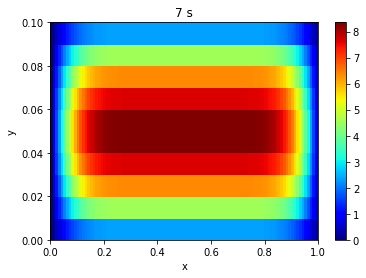

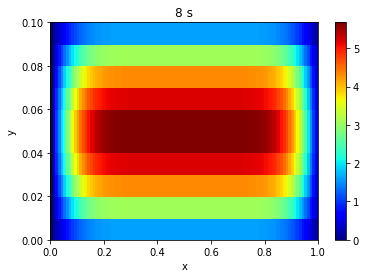

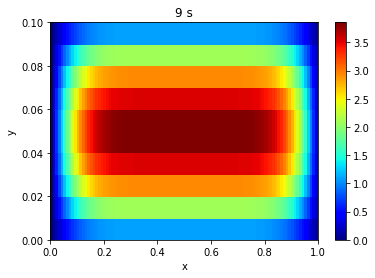

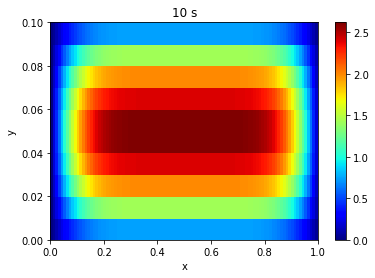

In [11]:
for i in range(11):
    plt.pcolor(X,Y,T[:,:,100*i].T,cmap='jet')
    plt.colorbar()
    plt.title('%i s'%i)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()